In [1]:
from google.colab import files

uploaded = files.upload()


Saving data.csv to data.csv


In [5]:
import pandas as pd
import numpy as np

data_df = pd.read_csv('data.csv')


def calculate_entropy(target_column):
    class_counts = target_column.value_counts()
    class_probabilities = class_counts / len(target_column)
    entropy = -sum(class_probabilities * np.log2(class_probabilities))
    return entropy


def calculate_information_gain(data, attribute, target_attribute):
    total_entropy = calculate_entropy(data[target_attribute])
    weighted_average_entropy = 0
    unique_values = data[attribute].unique()
    for value in unique_values:
        subset = data[data[attribute] == value]
        weighted_average_entropy += (len(subset) / len(data)) * calculate_entropy(subset[target_attribute])
    information_gain = total_entropy - weighted_average_entropy
    return information_gain


attribute_information_gains = {}
target_attribute_name = 'buys_computer'


for column in data_df.columns:
    if column != target_attribute_name:
        info_gain = calculate_information_gain(data_df, column, target_attribute_name)
        attribute_information_gains[column] = info_gain


root_node_attribute = max(attribute_information_gains, key=attribute_information_gains.get)


for attribute, info_gain in attribute_information_gains.items():
    print(f'{attribute}: {info_gain}')


print(f'Root Node (based on Information Gain): {root_node_attribute}')


age: 0.24674981977443933
income: 0.02922256565895487
student: 0.15183550136234159
credit_rating: 0.04812703040826949
Root Node (based on Information Gain): age


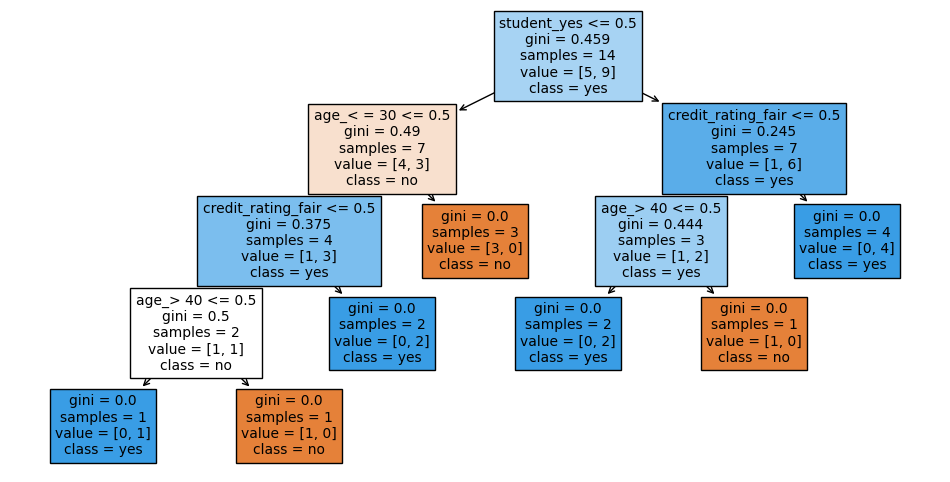

Depth of the Decision Tree: 4


In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('data.csv')


features = data.drop(columns=['buys_computer'])
target = data['buys_computer']


non_numeric_cols = [col for col in features.columns if features[col].dtype == 'object']


encoded_features = pd.get_dummies(features, columns=non_numeric_cols, drop_first=True)


label_encoder = LabelEncoder()


for col in encoded_features.columns:
    if encoded_features[col].dtype == 'object':
        encoded_features[col] = label_encoder.fit_transform(encoded_features[col])


classifier = DecisionTreeClassifier(random_state=42)


classifier.fit(encoded_features, target)


plt.figure(figsize=(12, 6))
plot_tree(classifier, filled=True, feature_names=encoded_features.columns, class_names=target.unique(), fontsize=10)
plt.show()


classifier.fit(encoded_features, target)


tree_depth = classifier.get_depth()
print(f"Depth of the Decision Tree: {tree_depth}")


In [8]:
from google.colab import files

uploaded = files.upload()


Saving mushrooms.csv to mushrooms.csv


Missing Data:
 class                       1
cap-shape                   1
cap-surface                 1
cap-color                   1
bruises                     1
odor                        1
gill-attachment             1
gill-spacing                1
gill-size                   1
gill-color                  1
stalk-shape                 1
stalk-root                  1
stalk-surface-above-ring    1
stalk-surface-below-ring    1
stalk-color-above-ring      1
stalk-color-below-ring      1
veil-type                   1
veil-color                  1
ring-number                 1
ring-type                   1
spore-print-color           1
population                  1
habitat                     1
dtype: int64
Training Set Accuracy: 1.0
Test Set Accuracy: 1.0


[Text(0.6111111111111112, 0.9375, 'odor_n <= 0.5\ngini = 0.499\nsamples = 6500\nvalue = [3370, 3129, 1]\nclass = p'),
 Text(0.3888888888888889, 0.8125, 'stalk-root_c <= 0.5\ngini = 0.284\nsamples = 3660\nvalue = [627, 3032, 1]\nclass = e'),
 Text(0.2777777777777778, 0.6875, 'stalk-root_r <= 0.5\ngini = 0.124\nsamples = 3214\nvalue = [213, 3000, 1]\nclass = e'),
 Text(0.2222222222222222, 0.5625, 'odor_a <= 0.5\ngini = 0.045\nsamples = 3070\nvalue = [69, 3000, 1]\nclass = e'),
 Text(0.16666666666666666, 0.4375, 'odor_l <= 0.5\ngini = 0.023\nsamples = 3035\nvalue = [34, 3000, 1]\nclass = e'),
 Text(0.1111111111111111, 0.3125, 'cap-shape_unknown <= 0.5\ngini = 0.001\nsamples = 3001\nvalue = [0, 3000, 1]\nclass = e'),
 Text(0.05555555555555555, 0.1875, 'gini = 0.0\nsamples = 3000\nvalue = [0, 3000, 0]\nclass = e'),
 Text(0.16666666666666666, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = unknown'),
 Text(0.2222222222222222, 0.3125, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]

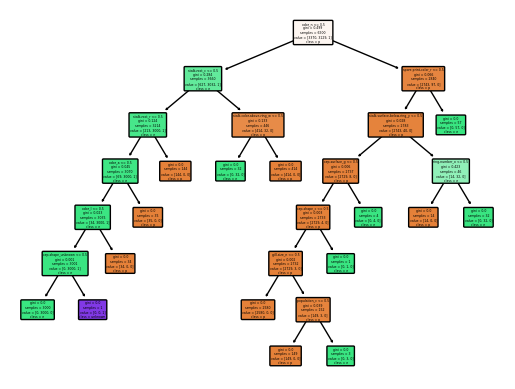

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


data_df = pd.read_csv('mushrooms.csv')


missing_data = data_df.isnull().sum()
print("Missing Data:\n", missing_data)


data_df.fillna('unknown', inplace=True)


X = data_df.drop(columns=['class'])
y = data_df['class']


X_encoded = pd.get_dummies(X)


train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


classifier = DecisionTreeClassifier(random_state=42)


classifier.fit(train_X, train_y)


training_accuracy = classifier.score(train_X, train_y)
print("Training Set Accuracy:", training_accuracy)


testing_accuracy = classifier.score(test_X, test_y)
print("Test Set Accuracy:", testing_accuracy)


unique_labels = data_df['class'].unique()


plot_tree(classifier, filled=True, feature_names=X_encoded.columns, class_names=unique_labels, rounded=True)


Missing Values:
 class                       1
cap-shape                   1
cap-surface                 1
cap-color                   1
bruises                     1
odor                        1
gill-attachment             1
gill-spacing                1
gill-size                   1
gill-color                  1
stalk-shape                 1
stalk-root                  1
stalk-surface-above-ring    1
stalk-surface-below-ring    1
stalk-color-above-ring      1
stalk-color-below-ring      1
veil-type                   1
veil-color                  1
ring-number                 1
ring-type                   1
spore-print-color           1
population                  1
habitat                     1
dtype: int64
Training Set Accuracy (Max Depth Constraint): 0.9993846153846154
Test Set Accuracy (Max Depth Constraint): 1.0


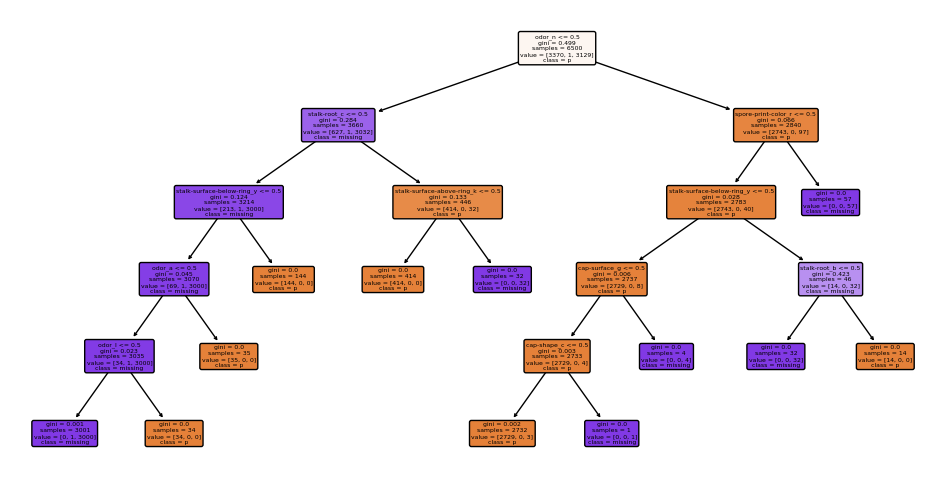

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


df = pd.read_csv('mushrooms.csv')


missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


df.fillna('missing', inplace=True)


X = df.drop(columns=['class'])
y = df['class']


X_encoded = pd.get_dummies(X)


Tr_X, Te_X, Tr_y, Te_y = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


model_max_depth = DecisionTreeClassifier(max_depth=5, random_state=42)


model_max_depth.fit(Tr_X, Tr_y)


train_accuracy_max_depth = model_max_depth.score(Tr_X, Tr_y)
print("Training Set Accuracy (Max Depth Constraint):", train_accuracy_max_depth)


test_accuracy_max_depth = model_max_depth.score(Te_X, Te_y)
print("Test Set Accuracy (Max Depth Constraint):", test_accuracy_max_depth)


plt.figure(figsize=(12, 6))
plot_tree(model_max_depth, filled=True, feature_names=X_encoded.columns, class_names=df['class'].unique(), rounded=True)
plt.show()


Missing Data:
 class                       1
cap-shape                   1
cap-surface                 1
cap-color                   1
bruises                     1
odor                        1
gill-attachment             1
gill-spacing                1
gill-size                   1
gill-color                  1
stalk-shape                 1
stalk-root                  1
stalk-surface-above-ring    1
stalk-surface-below-ring    1
stalk-color-above-ring      1
stalk-color-below-ring      1
veil-type                   1
veil-color                  1
ring-number                 1
ring-type                   1
spore-print-color           1
population                  1
habitat                     1
dtype: int64
Training Set Accuracy (Entropy Criterion): 1.0
Test Set Accuracy (Entropy Criterion): 1.0


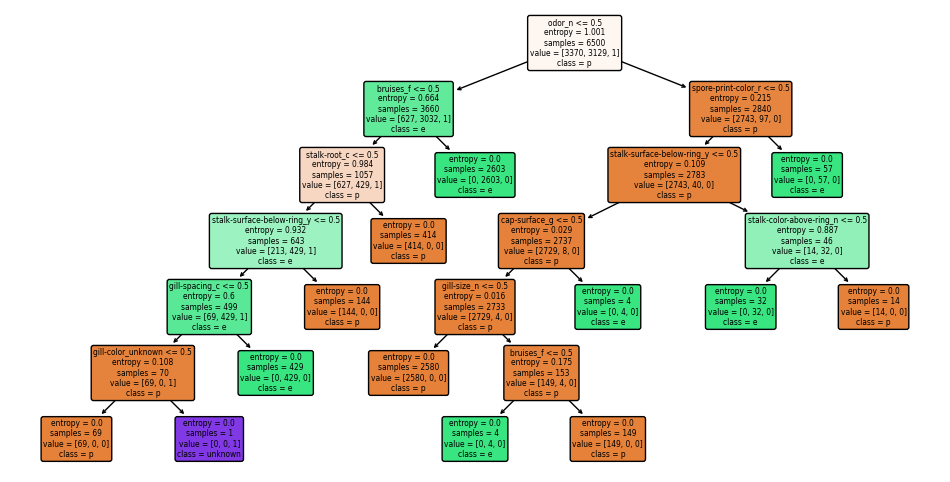

In [11]:
data = pd.read_csv('mushrooms.csv')


missing_data = data.isnull().sum()
print("Missing Data:\n", missing_data)


data.fillna('unknown', inplace=True)


features = data.drop(columns=['class'])
target = data['class']


encoded_features = pd.get_dummies(features)


train_features, test_features, train_target, test_target = train_test_split(encoded_features, target, test_size=0.2, random_state=42)


entropy_classifier = DecisionTreeClassifier(criterion="entropy", random_state=42)


entropy_classifier.fit(train_features, train_target)


train_accuracy_entropy = entropy_classifier.score(train_features, train_target)
print("Training Set Accuracy (Entropy Criterion):", train_accuracy_entropy)


test_accuracy_entropy = entropy_classifier.score(test_features, test_target)
print("Test Set Accuracy (Entropy Criterion):", test_accuracy_entropy)


plt.figure(figsize=(12, 6))
plot_tree(entropy_classifier, filled=True, feature_names=encoded_features.columns, class_names=data['class'].unique(), rounded=True)
plt.show()


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


data = pd.read_csv('mushrooms.csv')


missing_data = data.isnull().sum()
print("Missing Data:\n", missing_data)


data.fillna('unknown', inplace=True)


features = data.drop(columns=['class'])
target = data['class']


encoded_features = pd.get_dummies(features)


train_features, test_features, train_target, test_target = train_test_split(encoded_features, target, test_size=0.2, random_state=42)


dt_classifier = DecisionTreeClassifier(random_state=42)


dt_classifier.fit(train_features, train_target)


dt_predictions = dt_classifier.predict(test_features)


dt_accuracy = accuracy_score(test_target, dt_predictions)
dt_classification_report = classification_report(test_target, dt_predictions)

print("Decision Tree Classifier Results:")
print("Accuracy:", dt_accuracy)
print("Classification Report:\n", dt_classification_report)


rf_classifier = RandomForestClassifier(random_state=42)


rf_classifier.fit(train_features, train_target)


rf_predictions = rf_classifier.predict(test_features)


rf_accuracy = accuracy_score(test_target, rf_predictions)
rf_classification_report = classification_report(test_target, rf_predictions)

print("\nRandom Forest Classifier Results:")
print("Accuracy:", rf_accuracy)
print("Classification Report:\n", rf_classification_report)


Missing Data:
 class                       1
cap-shape                   1
cap-surface                 1
cap-color                   1
bruises                     1
odor                        1
gill-attachment             1
gill-spacing                1
gill-size                   1
gill-color                  1
stalk-shape                 1
stalk-root                  1
stalk-surface-above-ring    1
stalk-surface-below-ring    1
stalk-color-above-ring      1
stalk-color-below-ring      1
veil-type                   1
veil-color                  1
ring-number                 1
ring-type                   1
spore-print-color           1
population                  1
habitat                     1
dtype: int64
Decision Tree Classifier Results:
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           e       1.00      1.00      1.00       838
           p       1.00      1.00      1.00       787

    accuracy                           1.00   